<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/cluster_Lon_Lat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [24]:
df_TH = pd.read_csv('/content/thrauseis_v2.csv',engine='python')
df_N=pd.read_csv('/content/paroxes_new_v2.csv',engine='python')
df_D=pd.read_csv('/content/paroxes_dokimwn_v2.csv', engine='python')


In [17]:
df_TH.drop(['Date'],axis=1)

,Par_id,LongX,LatY
0,16124030,474965.2975,4204608.390
1,16090342,474838.0475,4207326.191
2,16091645,482814.3981,4205011.590
3,14343189,478698.8978,4190348.599
4,16188505,472172.9373,4200387.070
...,...,...,...
5806,19251358,470931.2572,4207272.991
5807,19251365,479433.6779,4210144.381
5808,19341048,479080.6378,4211649.651
5809,19188419,475810.8576,4198845.480


In [5]:
df_N.drop(['Par_homeid','Met_id','LongX_home','LatY_home'],axis=1)

,Par_id,LongX,LatY
0,45006,471091.9572,4199889.170
1,45008,471099.7772,4199888.870
2,45008,471099.7772,4199888.870
3,327,476443.3276,4203467.140
4,327,476443.3276,4203467.140
...,...,...,...
129693,143375,472195.4373,4204761.980
129694,469865,472326.8473,4208809.961
129695,226856,475372.6775,4197701.250
129696,143050,472486.4873,4205181.620


In [6]:
df_D.drop(['Met_id','tested'],axis=1)

,Par_id,LongX,LatY
0,531,486347.8499,4213326.302
1,711,485990.9960,4213326.041
2,1025,486206.1385,4213267.351
3,1030,486202.1923,4213269.396
4,1037,486135.1158,4213256.276
...,...,...,...
10838,8516340,491283.4127,4223333.665
10839,8516548,490925.3499,4223253.122
10840,8516654,490903.1472,4222820.820
10841,8516827,490330.1372,4223104.921


In [4]:
df=pd.concat([df_D,df_TH,df_N],ignore_index=True)
data=df.drop(['Par_homeid','Met_id','LongX_home','LatY_home','tested','Date'],axis=1)
data['LongX'] = pd.to_numeric(data['LongX'], errors='ignore')
data['LatY'] = pd.to_numeric(data['LatY'], errors='ignore')

data

,Par_id,LongX,LatY
0,531,486347.8499,4213326.302
1,711,485990.9960,4213326.041
2,1025,486206.1385,4213267.351
3,1030,486202.1923,4213269.396
4,1037,486135.1158,4213256.276
...,...,...,...
146347,143375,472195.4373,4204761.980
146348,469865,472326.8473,4208809.961
146349,226856,475372.6775,4197701.250
146350,143050,472486.4873,4205181.620


In [5]:
data=df.loc[:,['Par_id','LongX','LatY']]
data.tail()

,Par_id,LongX,LatY
146347,143375,472195.4373,4204761.980
146348,469865,472326.8473,4208809.961
146349,226856,475372.6775,4197701.250
146350,143050,472486.4873,4205181.620
146351,12799,475765.1576,4203755.730


In [9]:
data.head(10)

,Par_id,LongX,LatY
0,531,486347.8499,4213326.302
1,711,485990.9960,4213326.041
2,1025,486206.1385,4213267.351
3,1030,486202.1923,4213269.396
4,1037,486135.1158,4213256.276
5,1476,486382.9620,4212861.306
6,1551,486221.9127,4212900.974
7,1862,486271.9138,4213032.309
8,1883,486318.2004,4212992.417
9,2156,486173.3933,4212978.596


In [6]:
data.dropna(axis=0,how='any',subset=['LongX','LatY'],inplace=True)

In [14]:
print(data.dtypes)

Par_id      int64
LongX     float64
LatY      float64
dtype: object


In [8]:
from IPython.display import display, Markdown
def report(df):
    display(Markdown('<b>head():</b>'))
    display(df.head())
    display(Markdown('<b>describe():</b>'))
    display(df.describe())
    display(Markdown('<b>info():</b>'))
    display(df.info(verbose=True))
    display(Markdown('<b>infer_dtype():</b>'))
    display(df.apply(lambda x: pd.api.types.infer_dtype(x.values)))
report(df)

<b>head():</b>

,Par_id,Met_id,LongX,LatY,tested,Date,Par_homeid,LongX_home,LatY_home
0,531,?85?38920,486347.8499,4213326.302,N,NaN,NaN,NaN,NaN
1,711,?89?00582,485990.9960,4213326.041,N,NaN,NaN,NaN,NaN
2,1025,?94?43006,486206.1385,4213267.351,N,NaN,NaN,NaN,NaN
3,1030,?99?30946,486202.1923,4213269.396,N,NaN,NaN,NaN,NaN
4,1037,?93?31067,486135.1158,4213256.276,N,NaN,NaN,NaN,NaN


<b>describe():</b>

,Par_id,LongX,LatY,Par_homeid,LongX_home,LatY_home
count,1.463520e+05,1.463280e+05,1.463280e+05,1.296980e+05,1.296980e+05,1.296980e+05
mean,1.029415e+06,4.736102e+05,4.200311e+06,1.019230e+06,4.399966e+05,4.143469e+06
std,3.439818e+06,9.003628e+04,1.387599e+05,6.725445e+05,3.504995e+05,5.400044e+05
min,1.270000e+02,-2.242969e+06,9.729977e+03,8.000000e+00,-2.242969e+06,9.729977e+03
25%,1.614510e+05,4.741760e+05,4.201184e+06,4.969112e+05,4.837247e+05,4.210833e+06
50%,3.304790e+05,4.765216e+05,4.204692e+06,9.436295e+05,4.861743e+05,4.214074e+06
75%,4.067460e+05,4.788390e+05,4.207545e+06,1.513486e+06,4.880462e+05,4.216694e+06
max,1.938319e+07,5.015134e+05,4.231573e+06,8.901853e+06,5.014895e+05,4.231236e+06


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146352 entries, 0 to 146351
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Par_id      146352 non-null  int64  
 1   Met_id      140541 non-null  object 
 2   LongX       146328 non-null  float64
 3   LatY        146328 non-null  float64
 4   tested      10843 non-null   object 
 5   Date        5811 non-null    object 
 6   Par_homeid  129698 non-null  float64
 7   LongX_home  129698 non-null  float64
 8   LatY_home   129698 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 10.0+ MB


None

<b>infer_dtype():</b>

Par_id         integer
Met_id          string
LongX         floating
LatY          floating
tested          string
Date            string
Par_homeid    floating
LongX_home    floating
LatY_home     floating
dtype: object

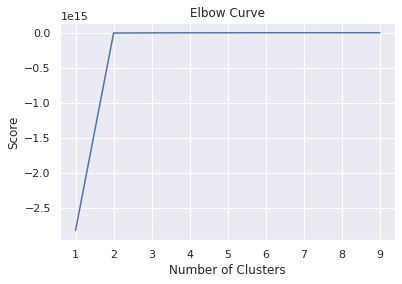

In [9]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['LatY']]
X_axis = data[['LongX']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, init ='random')
kmeans.fit(data[data.columns[1:3]]) # Compute k-means clustering.
data['cluster_label'] = kmeans.fit_predict(data[data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(data[data.columns[1:3]]) # Labels of each point
data

,Par_id,LongX,LatY,cluster_label
0,531,486347.8499,4213326.302,1
1,711,485990.9960,4213326.041,1
2,1025,486206.1385,4213267.351,1
3,1030,486202.1923,4213269.396,1
4,1037,486135.1158,4213256.276,1
...,...,...,...,...
146347,143375,472195.4373,4204761.980,0
146348,469865,472326.8473,4208809.961,0
146349,226856,475372.6775,4197701.250,0
146350,143050,472486.4873,4205181.620,0


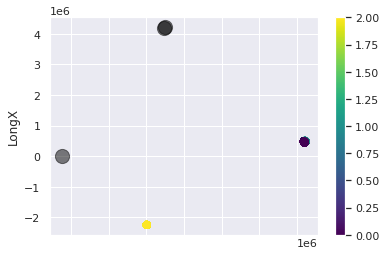

In [12]:
data.plot.scatter(y = 'LongX',x = 'LatY', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [13]:
data.head()

,Par_id,LongX,LatY,cluster_label
0,531,486347.8499,4213326.302,1
1,711,485990.9960,4213326.041,1
2,1025,486206.1385,4213267.351,1
3,1030,486202.1923,4213269.396,1
4,1037,486135.1158,4213256.276,1


In [14]:
data= data[['Par_id','cluster_label']]

In [25]:

clustered_data = df.merge(data, left_on='Par_id', right_on='Par_id')
clustered_data.drop(['Date','Par_homeid','LongX_home','LatY_home','tested'],axis=1)


,Par_id,Met_id,LongX,LatY,cluster_label
0,531,?85?38920,486347.8499,4213326.302,1
1,711,?89?00582,485990.9960,4213326.041,1
2,1025,?94?43006,486206.1385,4213267.351,1
3,1030,?99?30946,486202.1923,4213269.396,1
4,1037,?93?31067,486135.1158,4213256.276,1
...,...,...,...,...,...
2617321,1035482,?18?29995,472420.9273,4209471.781,0
2617322,352705,?18?32013,476568.3876,4205418.470,0
2617323,479937,?18?23444,473290.3174,4208349.501,0
2617324,516594,?18?23086,477827.3777,4216474.451,1


In [26]:
clustered_data.to_csv ('clustered_data.csv', index=None, header = True)

In [ ]:
!pip install geopandas

In [30]:

# importing libraries
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

In [33]:

# creating a geometry column 
geometry = [Point(xy) for xy in zip(clustered_data['LatY'], clustered_data['LongX'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(clustered_data, crs=crs, geometry=geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [34]:
gdf 

,Par_id,Met_id,LongX,LatY,tested,Date,Par_homeid,LongX_home,LatY_home,cluster_label,geometry
0,531,?85?38920,486347.8499,4213326.302,N,NaN,NaN,NaN,NaN,1,POINT (4213326.302 486347.850)
1,711,?89?00582,485990.9960,4213326.041,N,NaN,NaN,NaN,NaN,1,POINT (4213326.041 485990.996)
2,1025,?94?43006,486206.1385,4213267.351,N,NaN,NaN,NaN,NaN,1,POINT (4213267.351 486206.139)
3,1030,?99?30946,486202.1923,4213269.396,N,NaN,NaN,NaN,NaN,1,POINT (4213269.396 486202.192)
4,1037,?93?31067,486135.1158,4213256.276,N,NaN,NaN,NaN,NaN,1,POINT (4213256.276 486135.116)
...,...,...,...,...,...,...,...,...,...,...,...
2617321,1035482,?18?29995,472420.9273,4209471.781,NaN,NaN,2258583.0,482308.8866,4219363.364,0,POINT (4209471.781 472420.927)
2617322,352705,?18?32013,476568.3876,4205418.470,NaN,NaN,2261510.0,486471.7801,4215305.914,0,POINT (4205418.470 476568.388)
2617323,479937,?18?23444,473290.3174,4208349.501,NaN,NaN,2251535.0,483154.7922,4218264.136,0,POINT (4208349.501 473290.317)
2617324,516594,?18?23086,477827.3777,4216474.451,NaN,NaN,2252685.0,487461.6585,4226624.032,1,POINT (4216474.451 477827.378)


In [35]:

# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5)

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4c0617b950> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>